In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Train shape:", x_train.shape, "Test shape:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train shape: (50000, 32, 32, 3) Test shape: (10000, 32, 32, 3)


In [ ]:
def build_autoencoder():
    input_img = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

autoencoder, encoder = build_autoencoder()
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, validation_split=0.1)

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0282 - val_loss: 0.0082
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0073 - val_loss: 0.0059
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0058 - val_loss: 0.0051
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0051 - val_loss: 0.0046
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 9/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 10/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 11/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 12/20
176/176 ━━━━━━━━━━━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


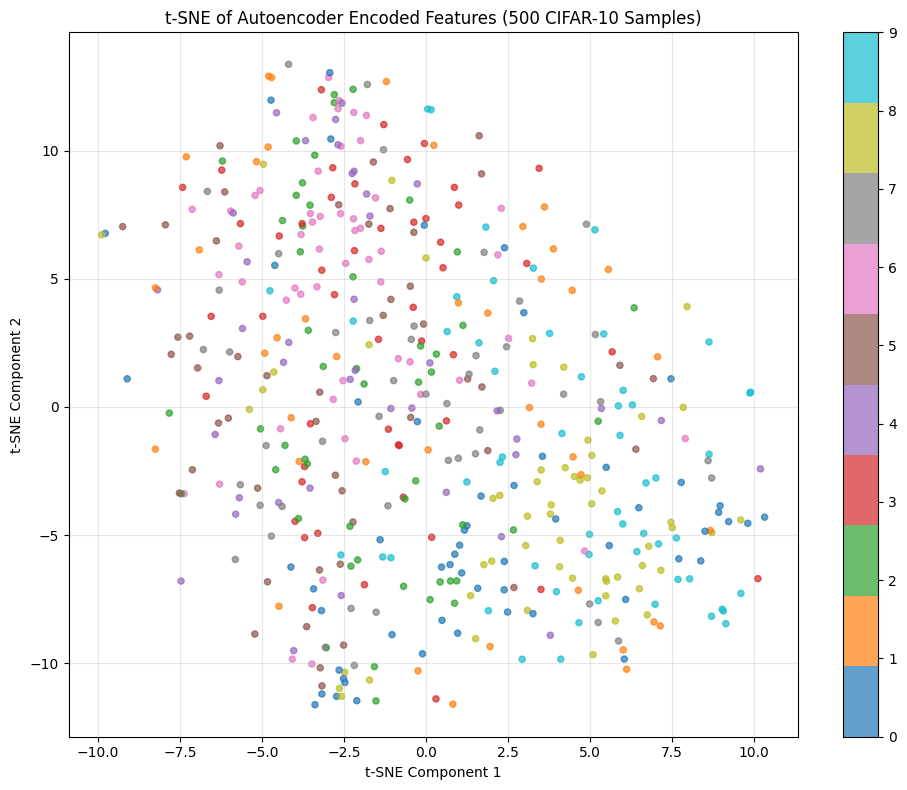

In [ ]:
# === Subset for performance
subset_size = 500
x_test_small = x_test[:subset_size]
y_test_small = y_test[:subset_size]

# === Convert one-hot y_test to class indices
y_test_labels = np.argmax(y_test_small, axis=1)  # shape: (1000,)

# === Extract features from encoder
encoded_features = encoder.predict(x_test_small)

# === Flatten features if they are not already 2D
if len(encoded_features.shape) > 2:
    flat_features = encoded_features.reshape((subset_size, -1))
else:
    flat_features = encoded_features

# === t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
features_2d = tsne.fit_transform(flat_features)

# === Plot the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    features_2d[:, 0],
    features_2d[:, 1],
    c=y_test_labels,         # Use class indices
    cmap='tab10',
    alpha=0.7,
    s=20
)
plt.colorbar(scatter, ticks=range(10))
plt.title("t-SNE of Autoencoder Encoded Features (500 CIFAR-10 Samples)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature_vector (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,154 (399.04 KB)

 Trainable params: 102,154 (399.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2483 - loss: 1.9777 - val_accuracy: 0.4289 - val_loss: 1.5625
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4369 - loss: 1.5239 - val_accuracy: 0.4990 - val_loss: 1.3879
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5100 - loss: 1.3489 - val_accuracy: 0.5219 - val_loss: 1.2987
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5535 - loss: 1.2397 - val_accuracy: 0.5686 - val_loss: 1.2144
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5842 - loss: 1.1665 - val_accuracy: 0.6084 - val_loss: 1.1137
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6094 - loss: 1.0954 - val_accuracy: 0.6150 - val_loss: 1.0925
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6331 - loss: 1.0329 - val_accuracy: 0.6404 - val_loss: 1.0281
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6507 - loss: 0.9886 - val_accuracy: 0.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


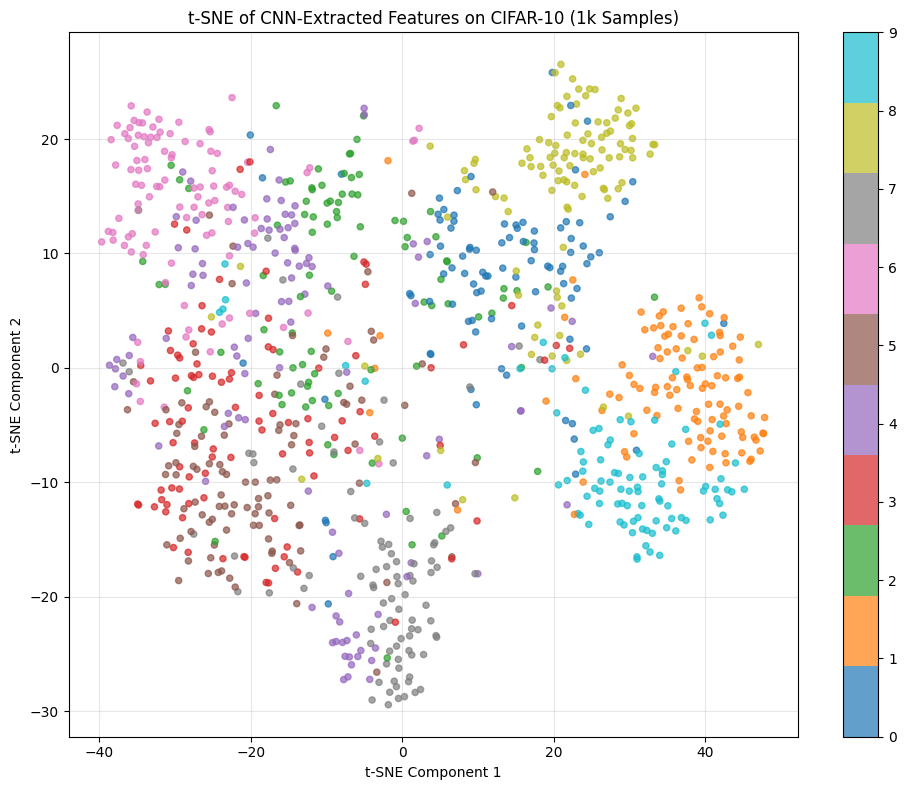

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# === 2. Build transfer learning model ===
# === 2. Build a custom CNN ===
inputs = tf.keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)  # <- use this for feature extraction
encoded = layers.Dense(64, activation='relu', name="feature_vector")(x)
outputs = layers.Dense(10, activation='softmax')(encoded)

model = models.Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# === 3. Train the model ===
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

# === 3. Create a feature extractor from "feature_vector" layer ===
feature_extractor = tf.keras.Model(inputs=model.input, outputs=model.get_layer("feature_vector").output)

# === 4. Select a subset of test samples ===
x_test_small = x_test[1000:2000]
y_test_small = y_test[1000:2000]
y_test_labels = np.argmax(y_test_small, axis=1)  # Convert from one-hot to class index

# === 5. Extract features ===
features = feature_extractor.predict(x_test_small)

# === 6. Apply t-SNE ===
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
features_2d = tsne.fit_transform(features)

# === 7. Plot the t-SNE results ===
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    features_2d[:, 0],
    features_2d[:, 1],
    c=y_test_labels,
    cmap='tab10',
    alpha=0.7,
    s=20
)
plt.colorbar(scatter, ticks=range(10))
plt.title("t-SNE of CNN-Extracted Features on CIFAR-10 (1k Samples)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0259 - val_loss: 0.0095
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0096 - val_loss: 0.0080
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0080 - val_loss: 0.0074
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0074 - val_loss: 0.0071
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0067 - val_loss: 0.0066
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0064 - val_loss: 0.0062
Epoch 9/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0063 - val_loss: 0.0062
Epoch 10/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0062 - val_loss: 0.0061
Epoch 11/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 12/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 

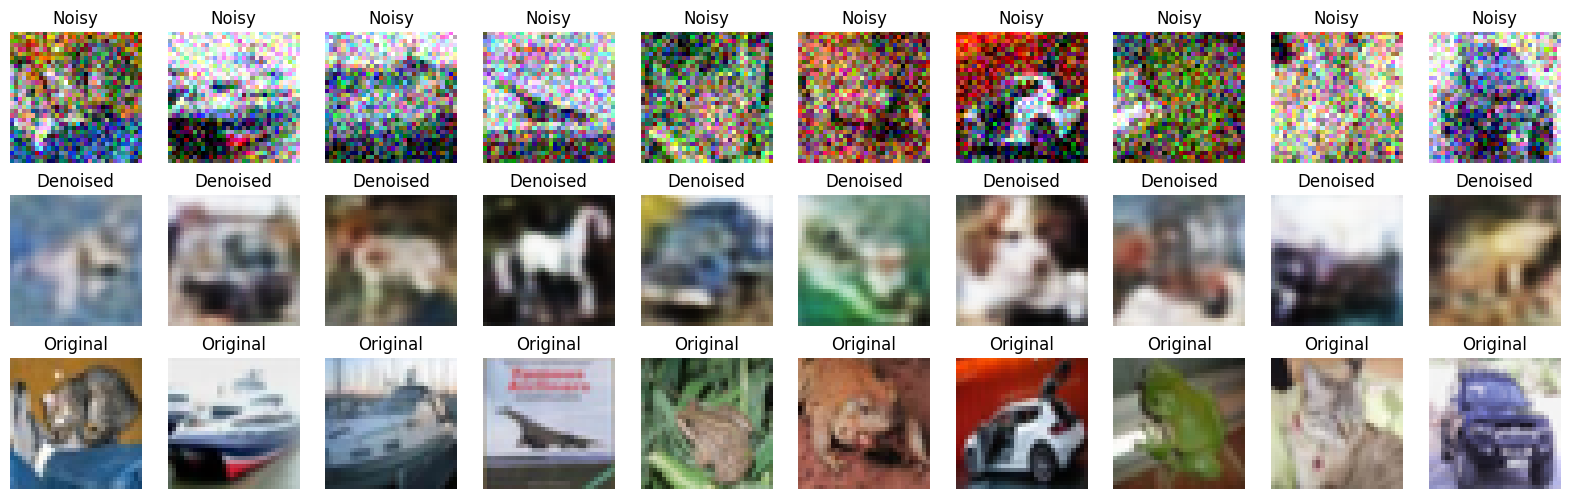

In [ ]:
def add_noise(images, noise_factor=0.2):
    noisy = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy, 0., 1.)

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Reuse same architecture
denoise_autoencoder, _ = build_autoencoder()
denoise_autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_split=0.1)

# Display denoising result
n = 10
decoded_imgs = denoise_autoencoder.predict(x_test_noisy[n:])

plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")

    # Denoised
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised")
    plt.axis("off")

    # Original
    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")
plt.show()


In [ ]:
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_no_aug = build_cnn_model()
history=cnn_no_aug.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=256)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.3143 - loss: 1.8941 - val_accuracy: 0.4978 - val_loss: 1.4346
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5229 - loss: 1.3633 - val_accuracy: 0.5658 - val_loss: 1.2440
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5800 - loss: 1.2045 - val_accuracy: 0.5869 - val_loss: 1.1636
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6102 - loss: 1.1202 - val_accuracy: 0.6137 - val_loss: 1.1242
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6405 - loss: 1.0356 - val_accuracy: 0.6347 - val_loss: 1.0444
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6545 - loss: 0.9954 - val_accuracy: 0.6361 - val_loss: 1.0612
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6664 - loss: 0.9626 - val_accuracy: 0.6566 - val_loss: 0.9884
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6887 - loss: 0.9034 - val_accuracy: 

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

cnn_aug = build_cnn_model()
history1=cnn_aug.fit(datagen.flow(x_train, y_train, batch_size=256),
            epochs=10, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 133ms/step - accuracy: 0.2680 - loss: 1.9951 - val_accuracy: 0.4704 - val_loss: 1.4727
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 123ms/step - accuracy: 0.4520 - loss: 1.5225 - val_accuracy: 0.5214 - val_loss: 1.3496
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 125ms/step - accuracy: 0.4938 - loss: 1.4119 - val_accuracy: 0.5310 - val_loss: 1.3447
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 125ms/step - accuracy: 0.5204 - loss: 1.3530 - val_accuracy: 0.5482 - val_loss: 1.3055
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 126ms/step - accuracy: 0.5425 - loss: 1.3012 - val_accuracy: 0.5763 - val_loss: 1.2205
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 126ms/step - accuracy: 0.5591 - loss: 1.2491 - val_accuracy: 0.6070 - val_loss: 1.1387
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 125ms/step - accuracy: 0.5797 - loss: 1.1860 - val_accuracy: 0.5988 - val_loss: 1.1756
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 24s 122ms/step - accuracy: 0.5878 - loss: 1

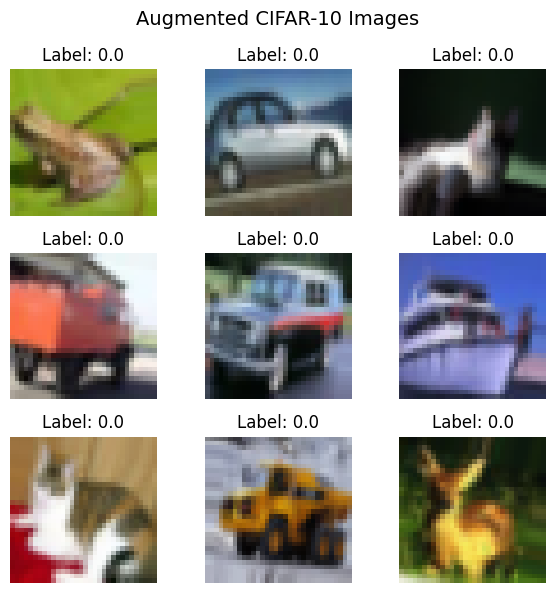

In [ ]:
import matplotlib.pyplot as plt

# Create an iterator
aug_iter = datagen.flow(x_train, y_train, batch_size=9)
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
# Get one batch of augmented images
augmented_images, augmented_labels = next(aug_iter)

# Plot them in a 3x3 grid
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.title(f"Label: {augmented_labels[i][0]}")
    plt.axis('off')
plt.suptitle("Augmented CIFAR-10 Images", fontsize=14)
plt.tight_layout()
plt.show()


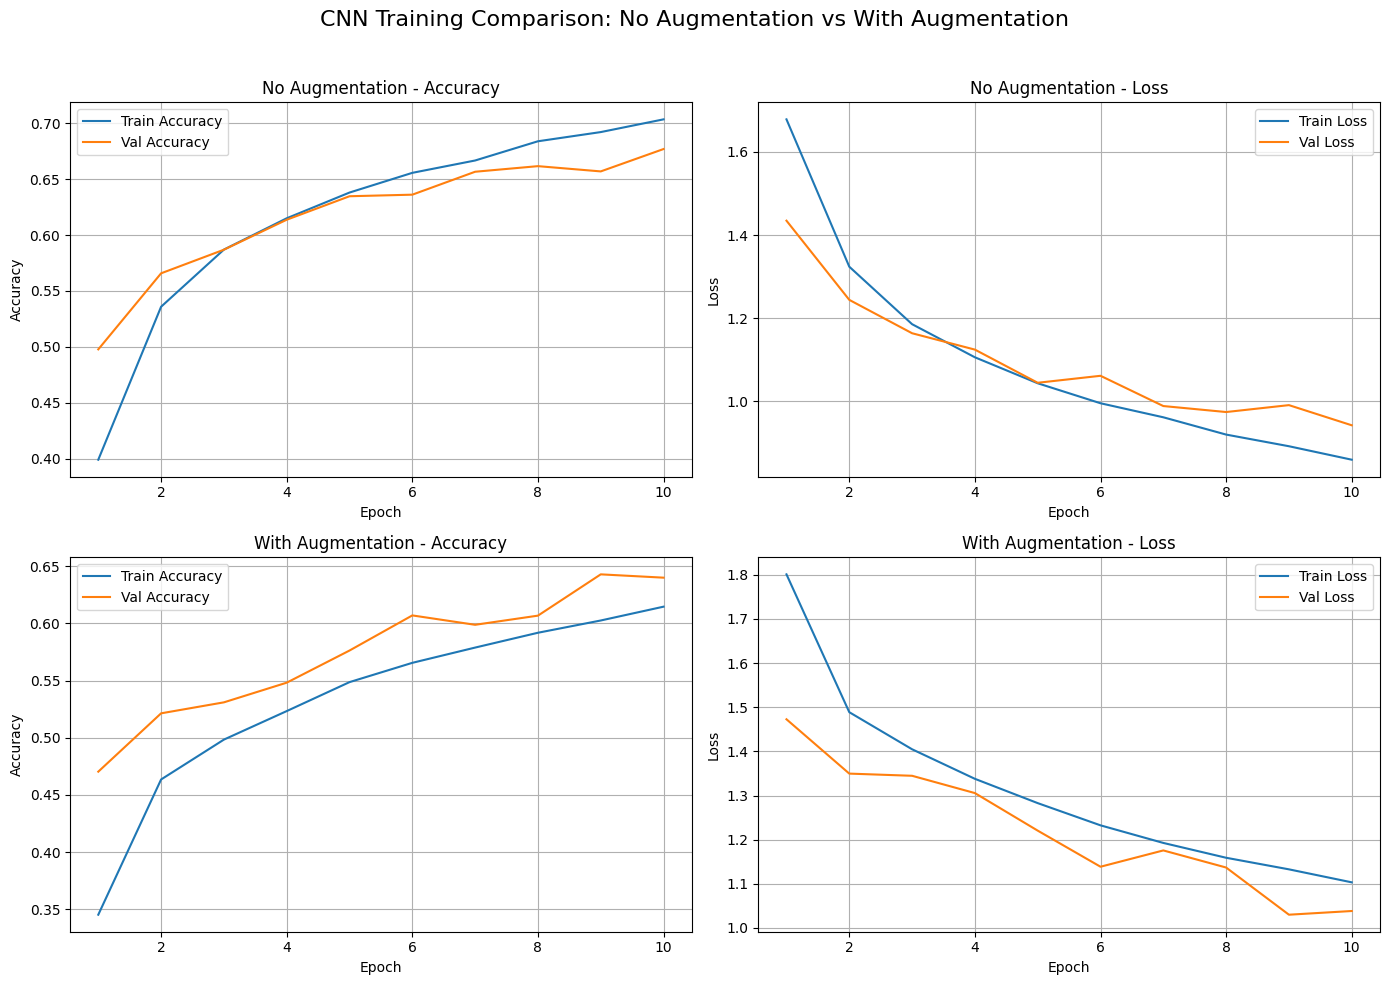

In [ ]:
# Extract metrics
acc_no_aug = history.history['accuracy']
val_acc_no_aug = history.history['val_accuracy']
loss_no_aug = history.history['loss']
val_loss_no_aug = history.history['val_loss']

acc_aug = history1.history['accuracy']
val_acc_aug = history1.history['val_accuracy']
loss_aug = history1.history['loss']
val_loss_aug = history1.history['val_loss']

epochs = range(1, len(acc_no_aug) + 1)

# Plot in 2x2 grid
plt.figure(figsize=(14, 10))

# 1st row: No Augmentation
plt.subplot(2, 2, 1)
plt.plot(epochs, acc_no_aug, label='Train Accuracy')
plt.plot(epochs, val_acc_no_aug, label='Val Accuracy')
plt.title('No Augmentation - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(epochs, loss_no_aug, label='Train Loss')
plt.plot(epochs, val_loss_no_aug, label='Val Loss')
plt.title('No Augmentation - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2nd row: With Augmentation
plt.subplot(2, 2, 3)
plt.plot(epochs, acc_aug, label='Train Accuracy' )
plt.plot(epochs, val_acc_aug, label='Val Accuracy')
plt.title('With Augmentation - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(epochs, loss_aug, label='Train Loss')
plt.plot(epochs, val_loss_aug, label='Val Loss')
plt.title('With Augmentation - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.suptitle("CNN Training Comparison: No Augmentation vs With Augmentation", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
